## 1) Configuracion e importacion de librerias

Si te falta alguna libreria en Jupyter, instala desde una celda asi:

```python
%pip install pandas numpy matplotlib
```


In [3]:
from pathlib import Path
import re
import unicodedata

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
plt.style.use('seaborn-v0_8-whitegrid')


## 2) Cargar datos

In [7]:
candidatos = [Path('datos_unificadosF.csv'), Path('datos_unificados.csv')]
input_file = next((p for p in candidatos if p.exists()), None)

if input_file is None:
    raise FileNotFoundError('No se encontro datos_unificadosF.csv ni datos_unificados.csv en esta carpeta.')

print(f'Archivo detectado: {input_file.resolve()}')

df_raw = pd.read_csv(input_file, encoding='utf-8-sig', low_memory=False)
print('Shape original:', df_raw.shape)
display(df_raw.head())


Archivo detectado: /Users/javiervalladares/Library/Mobile Documents/com~apple~CloudDocs/Séptimo semestre/Mineria de datos/Proyecto/datos_unificadosF.csv
Shape original: (69944, 45)


,DEPREG,MUPREG,MESREG,AÑOREG,DIAOCU,MESOCU,DEPOCU,MUPOCU,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,NACMUJ,ESCHOM,ESCMUJ,OCUHOM,OCUMUJ,origen_archivo,PUEHOM,PUEMUJ,CIUOHOM,CIUOMUJ,depreg,mupreg,mesreg,añoreg,diaocu,mesocu,añoocu,depocu,mupocu,edadhom,edadmuj,grethom,gretmuj,nachom,nacmuj,escohom,escomuj,ocupahom,ocupamuj,AÑOOCU,PPERHOM,PPERMUJ
0,17.0,1708.0,3.0,2012.0,16.0,2.0,17.0,1703.0,999.0,33.0,9.0,2.0,320.0,320.0,9.0,4.0,9712.0,110.0,Divorcios12.sav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,1213.0,5.0,2012.0,3.0,2.0,12.0,1215.0,35.0,30.0,2.0,2.0,320.0,320.0,5.0,9.0,110.0,1120.0,Divorcios12.sav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,101.0,4.0,2012.0,27.0,3.0,1.0,101.0,33.0,32.0,9.0,2.0,320.0,320.0,5.0,5.0,2142.0,1120.0,Divorcios12.sav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.0,1416.0,6.0,2012.0,28.0,5.0,14.0,1401.0,31.0,28.0,9.0,2.0,320.0,320.0,1.0,4.0,8189.0,1120.0,Divorcios12.sav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,101.0,10.0,2012.0,12.0,3.0,1.0,101.0,27.0,29.0,2.0,2.0,320.0,320.0,4.0,5.0,1346.0,1212.0,Divorcios12.sav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3) Normalizacion de nombres y unificacion de columnas historicas

In [ ]:
def normalizar_nombre(col):
    col = str(col).strip().lower()
    col = unicodedata.normalize('NFKD', col)
    col = ''.join(ch for ch in col if not unicodedata.combining(ch))
    col = re.sub(r'[^a-z0-9]+', '_', col).strip('_')
    return col

# Copia de trabajo
_df = df_raw.copy()
_df.columns = [normalizar_nombre(c) for c in _df.columns]

# Mapa de aliases -> variable canonica
aliases = {
    'depreg': ['depreg'],
    'mupreg': ['mupreg'],
    'mesreg': ['mesreg'],
    'anoreg': ['anoreg'],
    'diaocu': ['diaocu'],
    'mesocu': ['mesocu'],
    'anoocu': ['anoocu'],
    'depocu': ['depocu'],
    'mupocu': ['mupocu'],
    'edadhom': ['edadhom'],
    'edadmuj': ['edadmuj'],
    'gethom': ['gethom', 'grethom'],
    'getmuj': ['getmuj', 'gretmuj'],
    'nachom': ['nachom'],
    'nacmuj': ['nacmuj'],
    'eschom': ['eschom', 'escohom'],
    'escmuj': ['escmuj', 'escomuj'],
    'ocuhom': ['ocuhom', 'ocupahom'],
    'ocumuj': ['ocumuj', 'ocupamuj'],
    'puehom': ['puehom'],
    'puemuj': ['puemuj'],
    'ciuohom': ['ciuohom'],
    'ciuomuj': ['ciuomuj'],
    'pperhom': ['pperhom'],
    'ppermuj': ['ppermuj'],
    'origen_archivo': ['origen_archivo'],
}

# Unificar columnas: toma el primer valor no nulo entre aliases
# Nota: _df puede tener nombres duplicados, y pandas los maneja.
df = pd.DataFrame(index=_df.index)
for canonica, candidatas in aliases.items():
    existentes = [c for c in candidatas if c in _df.columns]
    if not existentes:
        df[canonica] = np.nan
    else:
        df[canonica] = _df[existentes].bfill(axis=1).iloc[:, 0]

# Espacios vacios -> NA
df = df.replace(r'^\s*$', pd.NA, regex=True)

print('Shape unificado:', df.shape)
display(df.head())


Shape unificado: (69944, 26)


,depreg,mupreg,mesreg,anoreg,diaocu,mesocu,anoocu,depocu,mupocu,edadhom,edadmuj,gethom,getmuj,nachom,nacmuj,eschom,escmuj,ocuhom,ocumuj,puehom,puemuj,ciuohom,ciuomuj,pperhom,ppermuj,origen_archivo
0,17.0,1708.0,3.0,2012.0,16.0,2.0,NaN,17.0,1703.0,999.0,33.0,9.0,2.0,320.0,320.0,9.0,4.0,9712.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,Divorcios12.sav
1,12.0,1213.0,5.0,2012.0,3.0,2.0,NaN,12.0,1215.0,35.0,30.0,2.0,2.0,320.0,320.0,5.0,9.0,110.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,Divorcios12.sav
2,1.0,101.0,4.0,2012.0,27.0,3.0,NaN,1.0,101.0,33.0,32.0,9.0,2.0,320.0,320.0,5.0,5.0,2142.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,Divorcios12.sav
3,14.0,1416.0,6.0,2012.0,28.0,5.0,NaN,14.0,1401.0,31.0,28.0,9.0,2.0,320.0,320.0,1.0,4.0,8189.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,Divorcios12.sav
4,1.0,101.0,10.0,2012.0,12.0,3.0,NaN,1.0,101.0,27.0,29.0,2.0,2.0,320.0,320.0,4.0,5.0,1346.0,1212.0,NaN,NaN,NaN,NaN,NaN,NaN,Divorcios12.sav


## 4) Limpieza basica de tipos (numericas y categoricas)

In [8]:
numeric_specs = {
    'mesreg': {'min': 1, 'max': 12, 'invalid': [99, 999]},
    'anoreg': {'min': 1950, 'max': 2100, 'invalid': [99, 999, 9999]},
    'diaocu': {'min': 1, 'max': 31, 'invalid': [99, 999]},
    'mesocu': {'min': 1, 'max': 12, 'invalid': [99, 999]},
    'anoocu': {'min': 1950, 'max': 2100, 'invalid': [99, 999, 9999]},
    'edadhom': {'min': 10, 'max': 110, 'invalid': [-1, 0, 99, 999, 9999]},
    'edadmuj': {'min': 10, 'max': 110, 'invalid': [-1, 0, 99, 999, 9999]},
}

categorical_cols = [
    'depreg', 'mupreg', 'depocu', 'mupocu', 'gethom', 'getmuj',
    'nachom', 'nacmuj', 'eschom', 'escmuj', 'ocuhom', 'ocumuj',
    'puehom', 'puemuj', 'ciuohom', 'ciuomuj', 'pperhom', 'ppermuj',
    'origen_archivo'
]

def limpiar_numerica(serie, spec):
    s = pd.to_numeric(serie, errors='coerce')
    invalidos = spec.get('invalid', [])
    if invalidos:
        s = s.mask(s.isin(invalidos))
    if 'min' in spec:
        s = s.mask(s < spec['min'])
    if 'max' in spec:
        s = s.mask(s > spec['max'])
    return s

def limpiar_categorica(serie, pad4=False):
    s = serie.astype('string').str.strip()
    s = s.replace({'': pd.NA, 'nan': pd.NA, 'None': pd.NA, '<NA>': pd.NA})
    s = s.str.replace(r'\.0$', '', regex=True)
    if pad4:
        s = s.where(s.isna(), s.str.zfill(4))
    return s

for col, spec in numeric_specs.items():
    if col in df.columns:
        df[col] = limpiar_numerica(df[col], spec)

for col in categorical_cols:
    if col in df.columns:
        df[col] = limpiar_categorica(df[col], pad4=(col in ['mupreg', 'mupocu']))

print('Tipos despues de limpieza:')
display(df.dtypes)


Tipos despues de limpieza:


depreg             string
mupreg             string
mesreg            float64
anoreg            float64
diaocu            float64
mesocu            float64
anoocu            float64
depocu             string
mupocu             string
edadhom           float64
edadmuj           float64
gethom             string
getmuj             string
nachom             string
nacmuj             string
eschom             string
escmuj             string
ocuhom             string
ocumuj             string
puehom             string
puemuj             string
ciuohom            string
ciuomuj            string
pperhom            string
ppermuj            string
origen_archivo     string
dtype: object

## 5) Descripcion general del conjunto de datos

In [9]:
n_obs = len(df)
n_vars = df.shape[1]

rango_anio = (int(df['anoreg'].min()), int(df['anoreg'].max())) if df['anoreg'].notna().any() else (None, None)

print('Cantidad de observaciones:', f'{n_obs:,}')
print('Cantidad de variables:', n_vars)
print('Cobertura temporal (anoreg):', rango_anio)

print('\nCompletitud por variable (% no nulo):')
completitud = (df.notna().mean() * 100).sort_values(ascending=False).rename('pct_no_nulo').to_frame()
display(completitud)


Cantidad de observaciones: 69,944
Cantidad de variables: 26
Cobertura temporal (anoreg): (2010, 2023)

Completitud por variable (% no nulo):


,pct_no_nulo
depreg,100.000000
depocu,100.000000
escmuj,100.000000
eschom,100.000000
mupreg,100.000000
mupocu,100.000000
origen_archivo,100.000000
mesreg,100.000000
diaocu,100.000000
mesocu,100.000000


## 6) Significado y tipo de cada variable

In [10]:
var_info = [
    ('depreg', 'categorica', 'Departamento donde se registro el divorcio (codigo INE).'),
    ('mupreg', 'categorica', 'Municipio donde se registro el divorcio (codigo INE).'),
    ('mesreg', 'numerica discreta', 'Mes de registro del divorcio.'),
    ('anoreg', 'numerica discreta', 'Anio de registro del divorcio.'),
    ('diaocu', 'numerica discreta', 'Dia de ocurrencia del divorcio.'),
    ('mesocu', 'numerica discreta', 'Mes de ocurrencia del divorcio.'),
    ('anoocu', 'numerica discreta', 'Anio de ocurrencia del divorcio.'),
    ('depocu', 'categorica', 'Departamento de ocurrencia del divorcio (codigo INE).'),
    ('mupocu', 'categorica', 'Municipio de ocurrencia del divorcio (codigo INE).'),
    ('edadhom', 'numerica discreta', 'Edad del hombre al momento del divorcio.'),
    ('edadmuj', 'numerica discreta', 'Edad de la mujer al momento del divorcio.'),
    ('gethom', 'categorica', 'Codigo de grupo etnico del hombre (catalogo INE).'),
    ('getmuj', 'categorica', 'Codigo de grupo etnico de la mujer (catalogo INE).'),
    ('nachom', 'categorica', 'Codigo de nacionalidad del hombre (catalogo INE).'),
    ('nacmuj', 'categorica', 'Codigo de nacionalidad de la mujer (catalogo INE).'),
    ('eschom', 'categorica', 'Codigo de escolaridad del hombre (catalogo INE).'),
    ('escmuj', 'categorica', 'Codigo de escolaridad de la mujer (catalogo INE).'),
    ('ocuhom', 'categorica', 'Codigo de ocupacion del hombre (catalogo INE/CIUO).'),
    ('ocumuj', 'categorica', 'Codigo de ocupacion de la mujer (catalogo INE/CIUO).'),
    ('puehom', 'categorica', 'Codigo de pueblo/pertenencia del hombre.'),
    ('puemuj', 'categorica', 'Codigo de pueblo/pertenencia de la mujer.'),
    ('ciuohom', 'categorica', 'Codigo CIUO resumido de ocupacion del hombre.'),
    ('ciuomuj', 'categorica', 'Codigo CIUO resumido de ocupacion de la mujer.'),
    ('pperhom', 'categorica', 'Codigo adicional de pertenencia del hombre.'),
    ('ppermuj', 'categorica', 'Codigo adicional de pertenencia de la mujer.'),
    ('origen_archivo', 'texto', 'Archivo .sav de origen.'),
]

diccionario = pd.DataFrame(var_info, columns=['variable', 'tipo', 'descripcion'])
diccionario['no_nulos'] = diccionario['variable'].map(lambda c: df[c].notna().sum() if c in df.columns else 0)
diccionario['nulos'] = len(df) - diccionario['no_nulos']
diccionario['pct_completitud'] = (diccionario['no_nulos'] / len(df) * 100).round(2)

display(diccionario)


,variable,tipo,descripcion,no_nulos,nulos,pct_completitud
0,depreg,categorica,Departamento donde se registro el divorcio (co...,69944,0,100.00
1,mupreg,categorica,Municipio donde se registro el divorcio (codig...,69944,0,100.00
2,mesreg,numerica discreta,Mes de registro del divorcio.,69944,0,100.00
3,anoreg,numerica discreta,Anio de registro del divorcio.,69944,0,100.00
4,diaocu,numerica discreta,Dia de ocurrencia del divorcio.,69944,0,100.00
5,mesocu,numerica discreta,Mes de ocurrencia del divorcio.,69944,0,100.00
6,anoocu,numerica discreta,Anio de ocurrencia del divorcio.,53670,16274,76.73
7,depocu,categorica,Departamento de ocurrencia del divorcio (codig...,69944,0,100.00
8,mupocu,categorica,Municipio de ocurrencia del divorcio (codigo I...,69944,0,100.00
9,edadhom,numerica discreta,Edad del hombre al momento del divorcio.,32830,37114,46.94


## 7) Exploracion de variables numericas (tendencia central, distribucion y orden)

In [11]:
numeric_cols = [c for c in ['mesreg', 'anoreg', 'diaocu', 'mesocu', 'anoocu', 'edadhom', 'edadmuj'] if c in df.columns]

resumen_num = pd.DataFrame(index=numeric_cols)
resumen_num['n_validos'] = df[numeric_cols].notna().sum()
resumen_num['n_faltantes'] = len(df) - resumen_num['n_validos']
resumen_num['pct_faltantes'] = (resumen_num['n_faltantes'] / len(df) * 100)

resumen_num['media'] = df[numeric_cols].mean()
resumen_num['mediana'] = df[numeric_cols].median()
resumen_num['moda'] = [df[c].mode(dropna=True).iloc[0] if not df[c].mode(dropna=True).empty else np.nan for c in numeric_cols]

resumen_num['desv_std'] = df[numeric_cols].std()
resumen_num['varianza'] = df[numeric_cols].var()
resumen_num['minimo'] = df[numeric_cols].min()
resumen_num['q1'] = df[numeric_cols].quantile(0.25)
resumen_num['q3'] = df[numeric_cols].quantile(0.75)
resumen_num['maximo'] = df[numeric_cols].max()
resumen_num['rango'] = resumen_num['maximo'] - resumen_num['minimo']
resumen_num['iqr'] = resumen_num['q3'] - resumen_num['q1']
resumen_num['p10'] = df[numeric_cols].quantile(0.10)
resumen_num['p90'] = df[numeric_cols].quantile(0.90)
resumen_num['asimetria'] = df[numeric_cols].skew(numeric_only=True)
resumen_num['curtosis'] = df[numeric_cols].kurtosis(numeric_only=True)

resumen_num = resumen_num.round(4)
display(resumen_num)


,n_validos,n_faltantes,pct_faltantes,media,mediana,moda,desv_std,varianza,minimo,q1,q3,maximo,rango,iqr,p10,p90,asimetria,curtosis
mesreg,69944,0,0.0000,6.5757,7.0,10.0,3.4118,11.6406,1.0,4.0,10.0,12.0,11.0,6.0,2.0,11.0,-0.0430,-1.2111
anoreg,69944,0,0.0000,2016.5219,2017.0,2022.0,3.6369,13.2269,2010.0,2013.0,2019.0,2023.0,13.0,6.0,2011.0,2022.0,-0.0173,-1.0496
diaocu,69944,0,0.0000,15.7214,16.0,18.0,8.6964,75.6268,1.0,8.0,23.0,31.0,30.0,15.0,4.0,28.0,0.0111,-1.1938
mesocu,69944,0,0.0000,6.3271,6.0,10.0,3.3000,10.8901,1.0,3.0,9.0,12.0,11.0,6.0,2.0,11.0,0.0204,-1.1672
anoocu,53670,16274,23.2672,2017.2969,2018.0,2022.0,3.5682,12.7319,2010.0,2015.0,2020.0,2022.0,12.0,5.0,2011.0,2022.0,-0.5843,-0.4142
edadhom,32830,37114,53.0624,35.8522,34.0,31.0,10.1036,102.0821,15.0,29.0,41.0,96.0,81.0,12.0,25.0,50.0,1.1436,1.5363
edadmuj,32968,36976,52.8651,32.5787,31.0,27.0,9.2294,85.1827,14.0,26.0,38.0,80.0,66.0,12.0,23.0,45.0,1.0326,1.2076


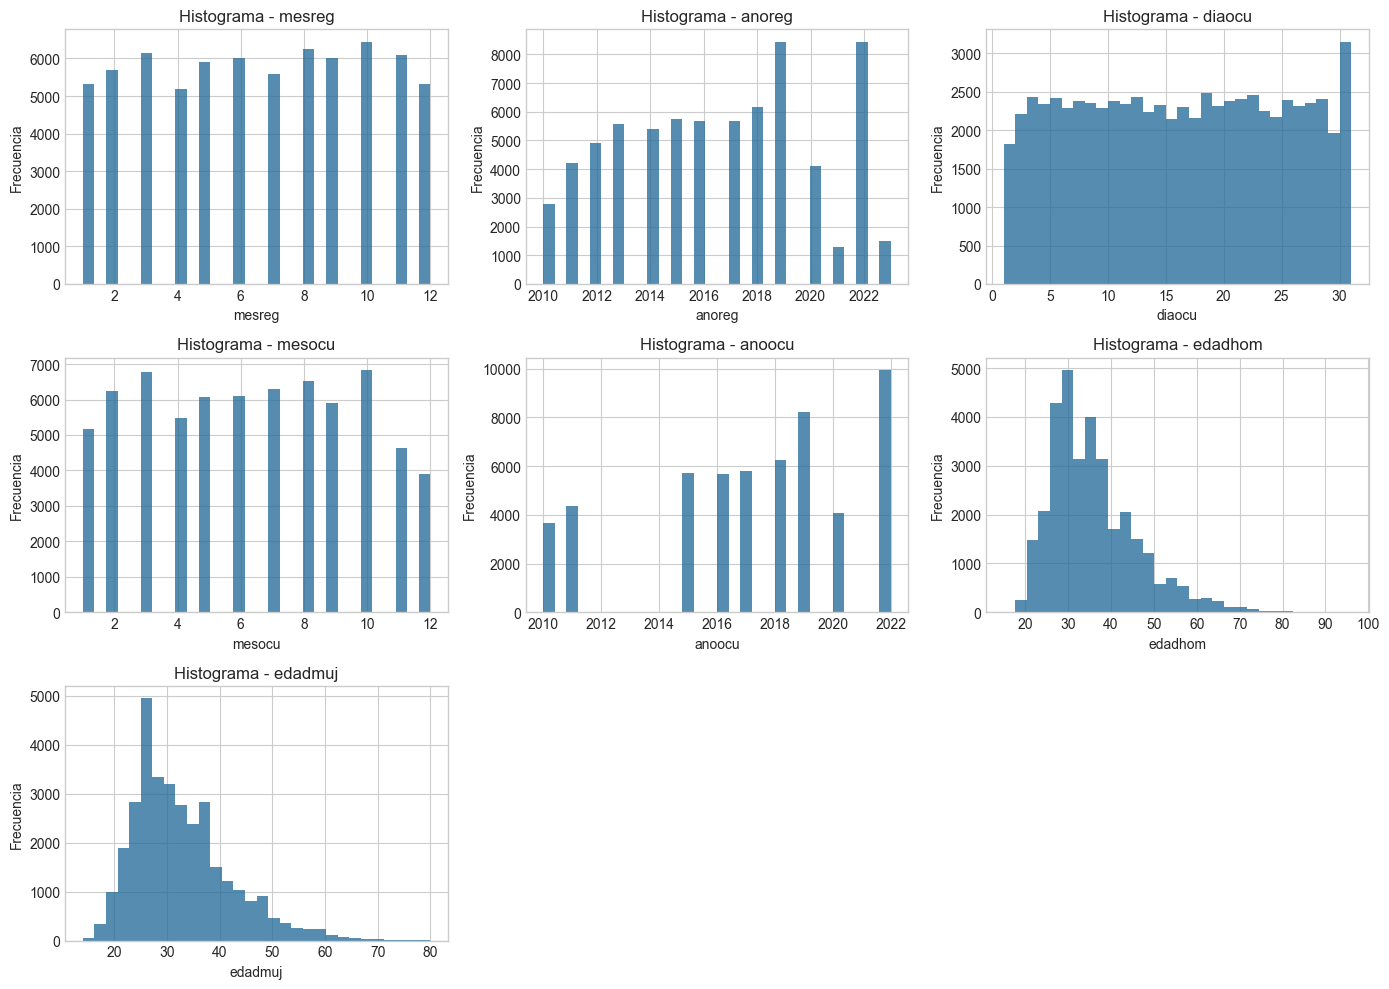

In [12]:
# Distribuciones numericas: histogramas
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=30, color='#2a6f9b', alpha=0.8)
    axes[i].set_title(f'Histograma - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


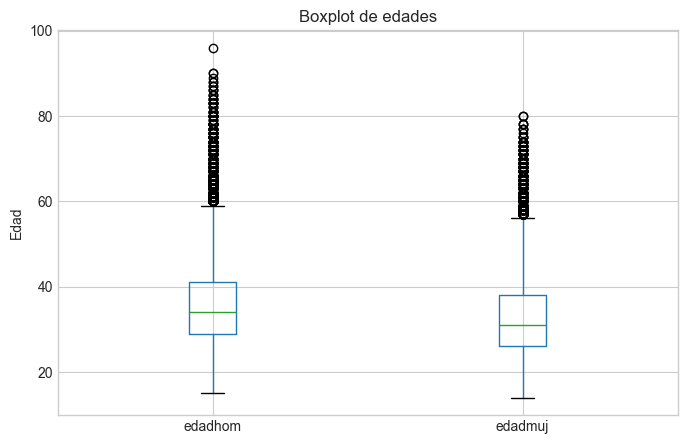

In [13]:
# Caja y bigotes para edades
cols_edad = [c for c in ['edadhom', 'edadmuj'] if c in df.columns]
if cols_edad:
    plt.figure(figsize=(8, 5))
    df[cols_edad].boxplot()
    plt.title('Boxplot de edades')
    plt.ylabel('Edad')
    plt.show()


## 8) Exploracion de variables categoricas y tablas de frecuencia

In [14]:
def tabla_frecuencia(dataframe, col, top=None):
    tabla = (
        dataframe[col]
        .value_counts(dropna=False)
        .rename_axis('categoria')
        .reset_index(name='frecuencia')
    )
    tabla['porcentaje'] = (tabla['frecuencia'] / len(dataframe) * 100).round(4)
    if top is not None:
        tabla = tabla.head(top)
    return tabla

categoricas = [
    'depreg', 'mupreg', 'depocu', 'mupocu', 'gethom', 'getmuj',
    'nachom', 'nacmuj', 'eschom', 'escmuj', 'ocuhom', 'ocumuj',
    'puehom', 'puemuj', 'ciuohom', 'ciuomuj', 'pperhom', 'ppermuj',
    'origen_archivo'
]

tablas_freq = {}
for col in categoricas:
    if col in df.columns:
        tablas_freq[col] = tabla_frecuencia(df, col, top=None)

print('Variables categoricas procesadas:', len(tablas_freq))


Variables categoricas procesadas: 19


In [15]:
# Ejemplo: top 15 para variables clave
for col in ['depreg', 'depocu', 'eschom', 'escmuj', 'gethom', 'getmuj', 'origen_archivo']:
    if col in tablas_freq:
        print('\n' + '='*90)
        print(f'Tabla de frecuencia: {col}')
        display(tablas_freq[col].head(15))



Tabla de frecuencia: depreg


,categoria,frecuencia,porcentaje
0,1,27308,39.0427
1,9,5343,7.639
2,5,3201,4.5765
3,22,2722,3.8917
4,12,2654,3.7945
5,10,2368,3.3856
6,13,2229,3.1868
7,18,2208,3.1568
8,11,2018,2.8852
9,17,1921,2.7465



Tabla de frecuencia: depocu


,categoria,frecuencia,porcentaje
0,1,26550,37.9589
1,9,5195,7.4274
2,5,3313,4.7366
3,22,3069,4.3878
4,12,2799,4.0018
5,10,2580,3.6887
6,13,2287,3.2698
7,18,2257,3.2269
8,11,1998,2.8566
9,14,1918,2.7422



Tabla de frecuencia: eschom


,categoria,frecuencia,porcentaje
0,9,36079,51.5827
1,4,11120,15.8984
2,1,8533,12.1998
3,2,5850,8.3638
4,3,4600,6.5767
5,5,3230,4.618
6,0,457,0.6534
7,6,75,0.1072



Tabla de frecuencia: escmuj


,categoria,frecuencia,porcentaje
0,9,35655,50.9765
1,4,11559,16.5261
2,1,8963,12.8145
3,2,5578,7.975
4,3,4644,6.6396
5,5,2964,4.2377
6,0,542,0.7749
7,6,39,0.0558



Tabla de frecuencia: gethom


,categoria,frecuencia,porcentaje
0,<NA>,56798,81.205
1,9,10139,14.4959
2,2,2424,3.4656
3,1,583,0.8335



Tabla de frecuencia: getmuj


,categoria,frecuencia,porcentaje
0,<NA>,56798,81.205
1,9,10164,14.5316
2,2,2447,3.4985
3,1,535,0.7649



Tabla de frecuencia: origen_archivo


,categoria,frecuencia,porcentaje
0,Divorcios09.sav,9950,14.2257
1,Divorcios19.sav,8203,11.728
2,Divorcios18.sav,6255,8.9429
3,Divorcios17.sav,5808,8.3038
4,Divorcios15.sav,5726,8.1865
5,Divorcios16.sav,5665,8.0993
6,Divorcios14.sav,5575,7.9707
7,Divorcios13.sav,5542,7.9235
8,Divorcios12.sav,5157,7.373
9,Divorcios11.sav,4344,6.2107


## 9) Relaciones entre variables

,anoreg,divorcios
0,2010,2792
1,2011,4223
2,2012,4927
3,2013,5581
4,2014,5392
5,2015,5735
6,2016,5674
7,2017,5694
8,2018,6158
9,2019,8430


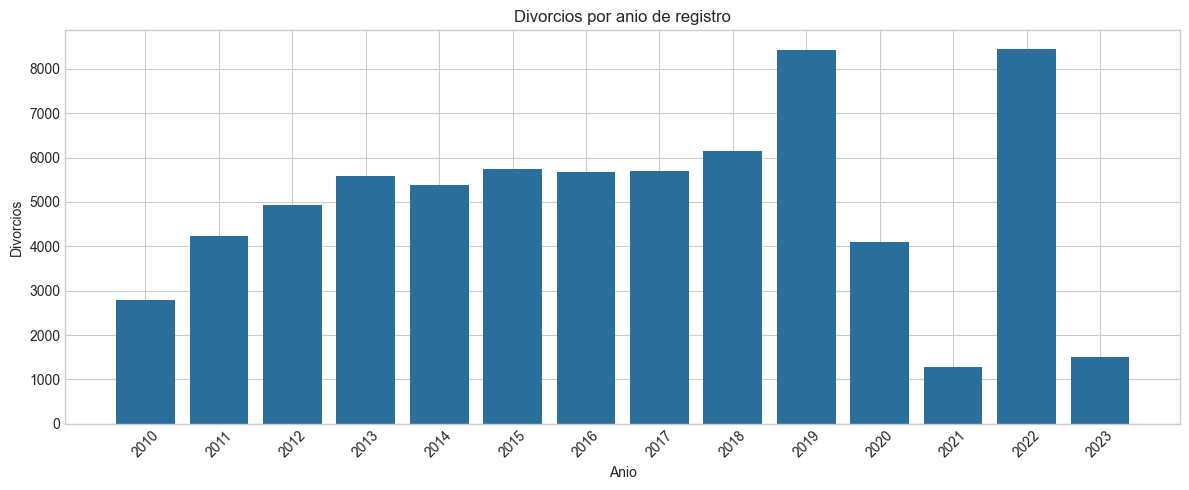

In [16]:
# 9.1 Divorcios por anio de registro
if 'anoreg' in df.columns:
    divorcios_por_anio = (
        df['anoreg']
        .dropna()
        .astype(int)
        .value_counts()
        .sort_index()
        .rename_axis('anoreg')
        .reset_index(name='divorcios')
    )
    display(divorcios_por_anio)

    plt.figure(figsize=(12, 5))
    plt.bar(divorcios_por_anio['anoreg'], divorcios_por_anio['divorcios'], color='#2a6f9b')
    plt.title('Divorcios por anio de registro')
    plt.xlabel('Anio')
    plt.ylabel('Divorcios')
    plt.xticks(divorcios_por_anio['anoreg'], rotation=45)
    plt.tight_layout()
    plt.show()


,depreg,divorcios,departamento
0,1,27308,Guatemala
1,9,5343,Quetzaltenango
2,5,3201,Escuintla
3,22,2722,Jutiapa
4,12,2654,San Marcos
5,10,2368,Suchitepequez
6,13,2229,Huehuetenango
7,18,2208,Izabal
8,11,2018,Retalhuleu
9,17,1921,Peten


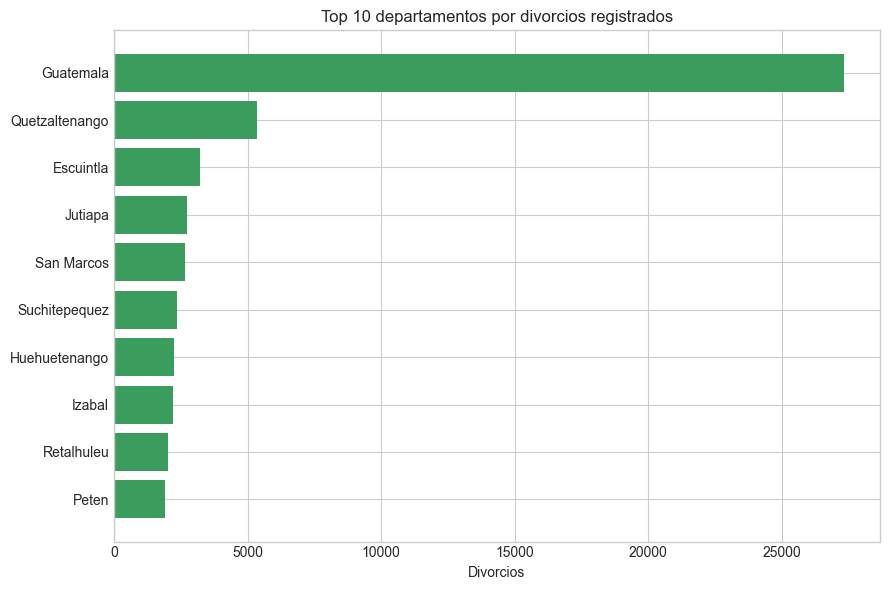

In [17]:
# 9.2 Divorcios por departamento (top)
departamentos_gt = {
    '1': 'Guatemala', '2': 'El Progreso', '3': 'Sacatepequez', '4': 'Chimaltenango',
    '5': 'Escuintla', '6': 'Santa Rosa', '7': 'Solola', '8': 'Totonicapan',
    '9': 'Quetzaltenango', '10': 'Suchitepequez', '11': 'Retalhuleu', '12': 'San Marcos',
    '13': 'Huehuetenango', '14': 'Quiche', '15': 'Baja Verapaz', '16': 'Alta Verapaz',
    '17': 'Peten', '18': 'Izabal', '19': 'Zacapa', '20': 'Chiquimula',
    '21': 'Jalapa', '22': 'Jutiapa'
}

if 'depreg' in df.columns:
    div_dep = (
        df['depreg']
        .dropna()
        .value_counts()
        .rename_axis('depreg')
        .reset_index(name='divorcios')
    )
    div_dep['departamento'] = div_dep['depreg'].astype(str).map(departamentos_gt).fillna('Sin nombre')
    div_dep = div_dep.sort_values('divorcios', ascending=False)
    display(div_dep.head(15))

    top_dep = div_dep.head(10).sort_values('divorcios', ascending=True)
    plt.figure(figsize=(9, 6))
    plt.barh(top_dep['departamento'], top_dep['divorcios'], color='#3a9d5d')
    plt.title('Top 10 departamentos por divorcios registrados')
    plt.xlabel('Divorcios')
    plt.tight_layout()
    plt.show()


In [18]:
# 9.3 Correlaciones numericas
corr_cols = [c for c in ['edadhom', 'edadmuj', 'anoreg', 'anoocu', 'mesreg', 'mesocu', 'diaocu'] if c in df.columns]

corr_pearson = df[corr_cols].corr(method='pearson')
corr_spearman = df[corr_cols].corr(method='spearman')

print('Correlacion Pearson')
display(corr_pearson)
print('Correlacion Spearman')
display(corr_spearman)


Correlacion Pearson


,edadhom,edadmuj,anoreg,anoocu,mesreg,mesocu,diaocu
edadhom,1.000000,0.799784,0.060592,0.063833,0.000562,0.003133,-0.000245
edadmuj,0.799784,1.000000,0.087308,0.089475,0.006508,0.004504,0.001953
anoreg,0.060592,0.087308,1.000000,0.993361,-0.065141,0.058689,0.002886
anoocu,0.063833,0.089475,0.993361,1.000000,-0.002403,-0.001428,0.002829
mesreg,0.000562,0.006508,-0.065141,-0.002403,1.000000,0.158271,0.014049
mesocu,0.003133,0.004504,0.058689,-0.001428,0.158271,1.000000,-0.034768
diaocu,-0.000245,0.001953,0.002886,0.002829,0.014049,-0.034768,1.000000


Correlacion Spearman


,edadhom,edadmuj,anoreg,anoocu,mesreg,mesocu,diaocu
edadhom,1.000000,0.783534,0.090435,0.100173,0.002175,0.004305,0.000232
edadmuj,0.783534,1.000000,0.116922,0.128070,0.008531,0.005019,0.003463
anoreg,0.090435,0.116922,1.000000,0.989812,-0.061038,0.057012,0.002524
anoocu,0.100173,0.128070,0.989812,1.000000,0.000190,0.005064,0.000356
mesreg,0.002175,0.008531,-0.061038,0.000190,1.000000,0.171514,0.014011
mesocu,0.004305,0.005019,0.057012,0.005064,0.171514,1.000000,-0.033252
diaocu,0.000232,0.003463,0.002524,0.000356,0.014011,-0.033252,1.000000


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 3.5 MB/s  0:00:05m0:00:0100:01

[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Pares validos para edades: 30,222
Correlacion Pearson edades: 0.7998
Correlacion Spearman edades: 0.7835


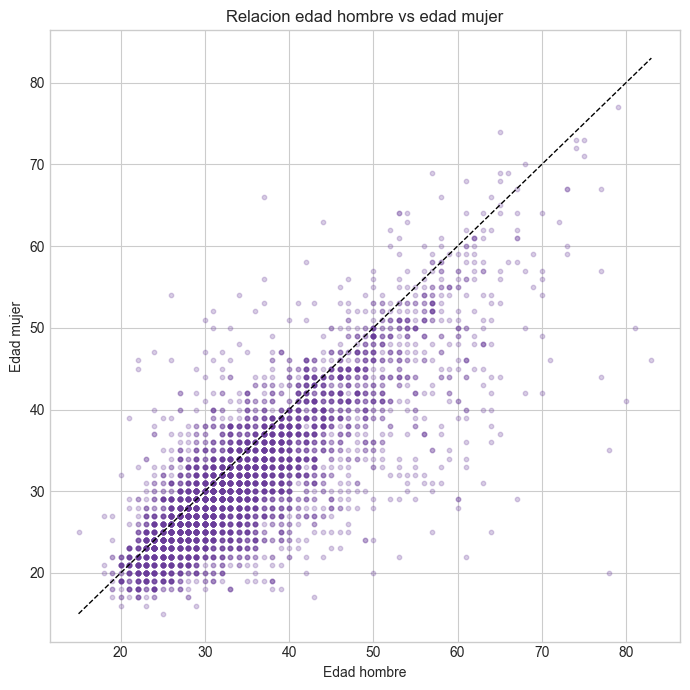

In [20]:
# 9.4 Relacion edad hombre vs edad mujer
%pip install scipy
if all(c in df.columns for c in ['edadhom', 'edadmuj']):
    pares_edad = df[['edadhom', 'edadmuj']].dropna()
    print('Pares validos para edades:', f'{len(pares_edad):,}')
    print('Correlacion Pearson edades:', round(pares_edad['edadhom'].corr(pares_edad['edadmuj'], method='pearson'), 4))
    print('Correlacion Spearman edades:', round(pares_edad['edadhom'].corr(pares_edad['edadmuj'], method='spearman'), 4))

    muestra = pares_edad.sample(min(5000, len(pares_edad)), random_state=42)
    plt.figure(figsize=(7, 7))
    plt.scatter(muestra['edadhom'], muestra['edadmuj'], s=10, alpha=0.25, color='#6a3d9a')
    lim_inf = min(muestra['edadhom'].min(), muestra['edadmuj'].min())
    lim_sup = max(muestra['edadhom'].max(), muestra['edadmuj'].max())
    plt.plot([lim_inf, lim_sup], [lim_inf, lim_sup], '--', color='black', linewidth=1)
    plt.xlabel('Edad hombre')
    plt.ylabel('Edad mujer')
    plt.title('Relacion edad hombre vs edad mujer')
    plt.tight_layout()
    plt.show()


In [21]:
# 9.5 Tablas cruzadas (categorica vs categorica)
if all(c in df.columns for c in ['eschom', 'escmuj']):
    crosstab_escolaridad = pd.crosstab(df['eschom'], df['escmuj'])
    print('Crosstab escolaridad hombre vs mujer')
    display(crosstab_escolaridad)

if all(c in df.columns for c in ['gethom', 'getmuj']):
    crosstab_etnia = pd.crosstab(df['gethom'], df['getmuj'])
    print('Crosstab grupo etnico hombre vs mujer')
    display(crosstab_etnia)


Crosstab escolaridad hombre vs mujer


escmuj,0,1,2,3,4,5,6,9
eschom,,,,,,,,
0,229,59,11,20,0,0,0,138
1,70,4821,680,310,594,157,3,1898
2,25,852,2374,850,864,66,0,819
3,20,352,829,1430,1349,109,1,510
4,0,589,785,1390,6202,1012,16,1126
5,0,182,63,115,1230,1235,17,388
6,0,2,1,3,24,30,1,14
9,198,2106,835,526,1296,355,1,30762


Crosstab grupo etnico hombre vs mujer


getmuj,1,2,9
gethom,,,
1,387,70,126
2,40,1692,692
9,108,685,9346
